In [1]:
from tensorflow import keras
from keras.datasets import fashion_mnist

In [2]:
(train_data,train_label), (test_data,test_label) = fashion_mnist.load_data()

In [3]:
train_data.shape

(60000, 28, 28)

In [5]:
test_data.shape

(10000, 28, 28)

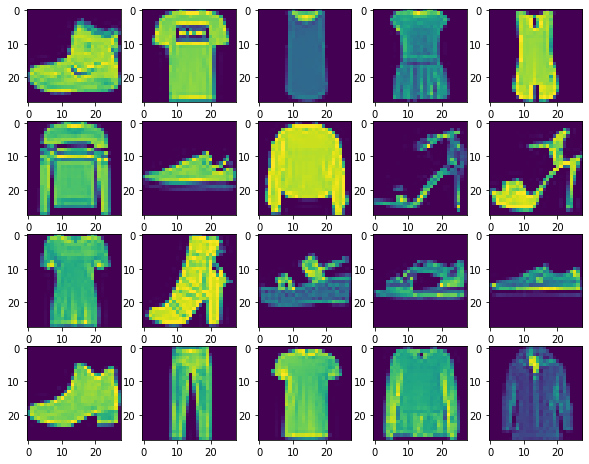

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(train_data[i])

In [9]:
train_data = train_data.reshape((60000,28,28,1)).astype('float32')/255
test_data = test_data.reshape((10000,28,28,1)).astype('float32')/255

In [10]:
from keras.utils import to_categorical
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [11]:
train_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [17]:
model_cnn=keras.Sequential()
model_cnn.add(keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1)))
model_cnn.add(keras.layers.MaxPooling2D((2,2)))
model_cnn.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model_cnn.add(keras.layers.MaxPooling2D((2,2)))
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(128,activation='relu'))
model_cnn.add(keras.layers.Dropout(0,4))
model_cnn.add(keras.layers.Dense(10,activation='softmax'))
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [18]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model_cnn.fit(train_data,train_label, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 41s 27ms/step - loss: 0.4729 - accuracy: 0.8311 - val_loss: 0.3696 - val_accuracy: 0.8683
Epoch 2/15
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3269 - accuracy: 0.8806 - val_loss: 0.3060 - val_accuracy: 0.8855
Epoch 3/15
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2792 - accuracy: 0.8974 - val_loss: 0.2810 - val_accuracy: 0.8964
Epoch 4/15
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2463 - accuracy: 0.9099 - val_loss: 0.2969 - val_accuracy: 0.8907
Epoch 5/15
1500/1500 [==============================] - 46s 31ms/step - loss: 0.2203 - accuracy: 0.9185 - val_loss: 0.2646 - val_accuracy: 0.9051
Epoch 6/15
1500/1500 [==============================] - 43s 29ms/step - loss: 0.1984 - accuracy: 0.9259 - val_loss: 0.2723 - val_accuracy: 0.9047
Epoch 7/15
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1740 - accuracy: 0.9360 - val_loss: 0.2676 -

In [16]:
print("Accuracy : ", model_cnn.evaluate(test_data,test_label)[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.4478 - accuracy: 0.9054
Accuracy :  0.9053999781608582
